# Simulasi Example 19.6  
Diberikan 250 pemegang polis dengan masing-masing peluang death, lapse, disable dan healthy secara berturut-turut adalah : 0.01,0.09,0.03 dan 0.87. Akan dilakukan simulasi untuk mengetahui berapa banyak orang yang mengidap salah satu kasus tersebut.  

# Alur Simulasi dengan Pseudo Uniform

Pertama akan dicari invers dari pseudouniform yang dimiliki. Dapat dilakukan dengan 2 pendekatan yaitu melalui Distribusi Binomial dan Distribusi Normal. Perhatikan bahwa informasi mengenai banyaknya orang ($n$) dan peluang seseorang mempunyai status terntentu diketahui. Sehingga dapat diaproksimasi rataan dan variansi dari kedua distribusi. Hal ini yang dapat membantu untuk menentukan banyak orang di suatu status. Hal penting yang perlu ditekankan adalah jumlah orang yang sudah memiliki status harus dipisahkan dengan jumlah orang yang belum memiliki status dan juga peluang dari suatu status menjadi peluang kondisional sehingga nilai peluangnya akan berubah.  

# Simulasi 

In [23]:
"Packages"

import pandas as pd 
import numpy as np
import random
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom,norm

np.set_printoptions(4)

In [24]:
print('Aproksimasi dengan menggunakan Distribusi Binomial \n')

"Konstanta yang Diketahui"
pseudo_random = [0.34,0.73,0.49] 

prob = [0.01,0.09,0.03,0.87] #Death Lapse Disable Healthy

cond_prob = [0.01,0.09/(1-0.01), 0.03/(1-0.01-0.09),1]
cond_prob_1 = [0.01,0.03/(1-0.01),0.09/(1-0.01-0.03),1]  #Death Disable Lapse Healthy

label = ['Death','Lapse','Disable','Healthy']
label_1 = ['Death','Disable','Lapse','Healthy']

"Iterasi Untuk menghitung banyaknya orang pada status Tertentu"

for i in range(len(pseudo_random)):
    n = 250 # Banyaknya orang
    sum = 0 # Menghitung Banyak orang yang sudah memiliki status
    
    print (f'Pseudo Uniform yang digunakan {pseudo_random[i]}')
    
    for j in range(len(prob)):
        target = binom.ppf(pseudo_random[i],n,cond_prob[j])
        print('Banyaknya orang yang', label[j] ,f'adalah {target}')
        n -= target
        sum += target
    print(sum)
    print()

Aproksimasi dengan menggunakan Distribusi Binomial 

Pseudo Uniform yang digunakan 0.34
Banyaknya orang yang Death adalah 2.0
Banyaknya orang yang Lapse adalah 21.0
Banyaknya orang yang Disable adalah 6.0
Banyaknya orang yang Healthy adalah 221.0
250.0

Pseudo Uniform yang digunakan 0.73
Banyaknya orang yang Death adalah 3.0
Banyaknya orang yang Lapse adalah 25.0
Banyaknya orang yang Disable adalah 9.0
Banyaknya orang yang Healthy adalah 213.0
250.0

Pseudo Uniform yang digunakan 0.49
Banyaknya orang yang Death adalah 2.0
Banyaknya orang yang Lapse adalah 22.0
Banyaknya orang yang Disable adalah 7.0
Banyaknya orang yang Healthy adalah 219.0
250.0



In [25]:
print('Aproksimasi dengan menggunakan Distribusi Normal \n')

"Konstanta yang Diketahui"
pseudo_random = [0.34,0.73,0.49]

prob = [0.01,0.09,0.03,0.87] #Death Lapse Disable Healthy

cond_prob = [0.01,0.09/(1-0.01), 0.03/(1-0.01-0.09),1]

label = ['Death','Lapse','Disable','Healthy']

"Iterasi Untuk menghitung banyaknya orang pada status Tertentu"
for i in range(len(pseudo_random)):
    n = 250 #Banyaknya orang 
    
    print (f'Pseudo Uniform yang digunakan {pseudo_random[i]}')
    
    for j in range(len(prob)-1): #Minus 1 karna status terakhir sudah pasti sisa dari yang belum memiliki status  
        target = np.around(norm.ppf(pseudo_random[i],loc = n*cond_prob[j], scale = np.sqrt(n*cond_prob[j]*(1-cond_prob[j]))))
        print('Banyaknya orang yang', label[j] ,f'adalah {target}')
        n -= target
    print('Banyaknya orang yang', label[3] ,f'adalah {n}')
    print()
    
"Catatan untuk aproksimasi normal nilai dari scale/deviasi tidak bisa 0 sehingga harus diakali dengan cara seperti diatas"

Aproksimasi dengan menggunakan Distribusi Normal 

Pseudo Uniform yang digunakan 0.34
Banyaknya orang yang Death adalah 2.0
Banyaknya orang yang Lapse adalah 21.0
Banyaknya orang yang Disable adalah 6.0
Banyaknya orang yang Healthy adalah 221.0

Pseudo Uniform yang digunakan 0.73
Banyaknya orang yang Death adalah 3.0
Banyaknya orang yang Lapse adalah 25.0
Banyaknya orang yang Disable adalah 9.0
Banyaknya orang yang Healthy adalah 213.0

Pseudo Uniform yang digunakan 0.49
Banyaknya orang yang Death adalah 2.0
Banyaknya orang yang Lapse adalah 22.0
Banyaknya orang yang Disable adalah 7.0
Banyaknya orang yang Healthy adalah 219.0



'Catatan untuk aproksimasi normal nilai dari scale/deviasi tidak bisa 0 sehingga harus diakali dengan cara seperti diatas'

# Alur Simulasi Tanpa Pseudouniform

Pertama akan dibuat fungsi yang berisikan banyak simulasi yang akan dilakukan yang diulang sebanyak pemegang polis (250 kali) tiap iterasinya.  
Dibangkitkan juga 3 buah bilangan random pada tiap iterasinya untuk menentukan status dari pemegang polis tersebut.  
  
Perhatikan bahwa jika dilakukan simulasi demikian maka, peluang dari kejadian yang kedua akan menjadi peluang bersyarat atau $P(X_2 |X_1)$ sehingga peluang dari kejadian kedua atau $q_2$ yang baru adalah $q_2^*=\frac{q_2}{1-q_1}$ begitu pula dengan $q_3$.  

In [26]:
def simulasi(simul = 10000, p_h = 250, q1 = 0.01, q2 = 0.09, q3 = 0.03):
    "Membuat array untuk masing-masing status"
    data = np.zeros((4,simul))
    
    for j in range(simul):
        
        for i in range(p_h):
            # Jika memenuhi maka Tidak memiliki status Death
            if np.random.rand()>= q1: 
                
                # Jika memenuhi maka Tidak memiliki status Lapse
                if np.random.rand()>=(q2/(1-q1)):
                    
                    # Jika memenuhi maka Tidak memiliki status Disable 
                    if np.random.rand()>=(q3/(1-q1-q2)):
                        data[3,j] += 1 # Healthy
                    
                    else :
                        data[2,j] +=1 # Disable
                
                else :
                    data[1,j] +=1 # Lapse
            
            else:
                data[0,j] += 1 # death
                
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flatten()
    n_bins = 5
    ax0.hist(data[0,:], n_bins, density=True, histtype='bar', stacked=True)
    ax0.set_title('Death Distribution')
    
    ax1.hist(data[1,:], n_bins, density=True, histtype='bar', stacked=True)
    ax1.set_title('Lapse Distribution')
    
    ax2.hist(data[2,:], n_bins, density=True, histtype='bar', stacked=True)
    ax2.set_title('Disable Distribution')

    ax3.hist(data[3,:], n_bins, density=True, histtype='bar', stacked=True)
    ax3.set_title('Healthy Distribution')

    fig.tight_layout()
    # line 1 points

    #simulasi = np.arange(1,simul+1)
    #plt.stackplot(simulasi,data, labels=['Death','Lapse','Disable','Healthy'])
    #plt.legend(loc='upper left')
    #plt.show()
    
    df = pd.DataFrame(dict(Death=data[0,:],
                           Lapse=data[1,:],
                           Disable=data[2,:],
                           Healthy=data[3,:],
                           ))
    fig = px.box(df)
    fig = px.histogram(df)
    fig.show()
    
    # boxplot
    
    #fig, ax = plt.subplots()
    #ax.boxplot(data.T)
    #ax.set_xticklabels(['Death', 'Lapse', 'Disable', 'Healthy'])
    #fig.show()
    
    return print(f'Hasil dari simulasi dengan banyak simulasi sebesar {simul} adalah :\n Rataan yang death : {data[0,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[0,:]))} \n Rataan yang lapse : {data[1,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[1,:]))}\n Rataan yang disable : {data[2,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[2,:]))}\n Rataan yang healthy : {data[3,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[3,:]))} \n'),data

Hasil dari simulasi dengan banyak simulasi sebesar 10000 adalah :
 Rataan yang death : 2.4856 dengan standar deviasi 1.5524795135524332 
 Rataan yang lapse : 22.4716 dengan standar deviasi 4.498754654346023
 Rataan yang disable : 7.402 dengan standar deviasi 2.6657449240315545
 Rataan yang healthy : 217.6408 dengan standar deviasi 5.272644057775947 



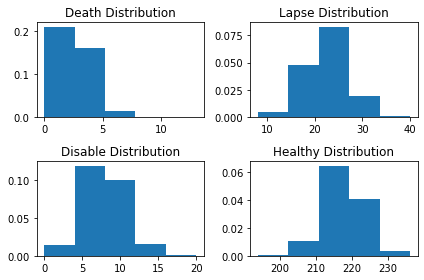

In [27]:
data = simulasi()[1]

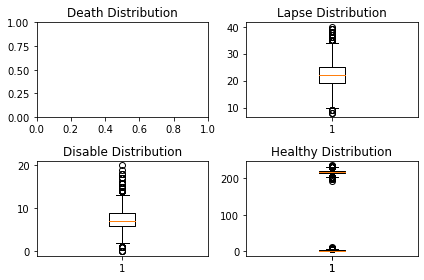

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()
n_bins = 5
plt.boxplot(data[0,:])
ax0.set_title('Death Distribution')

ax1.boxplot(data[1,:])
ax1.set_title('Lapse Distribution')

ax2.boxplot(data[2,:])
ax2.set_title('Disable Distribution')

ax3.boxplot(data[3,:])
ax3.set_title('Healthy Distribution')

fig.tight_layout()

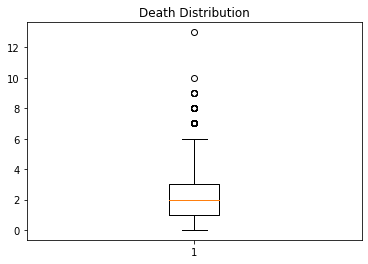

In [29]:
plt.boxplot(data[0,:])
plt.title('Death Distribution')
plt.show()

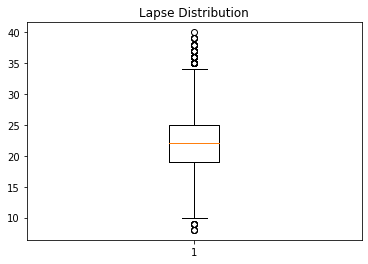

In [30]:
plt.boxplot(data[1,:])
plt.title('Lapse Distribution')
plt.show()

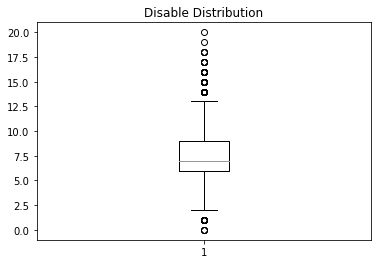

In [31]:
plt.boxplot(data[2,:])
plt.title('Disable Distribution')
plt.show()

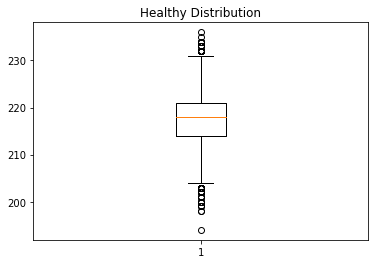

In [32]:
plt.boxplot(data[3,:])
plt.title('Healthy Distribution')
plt.show()

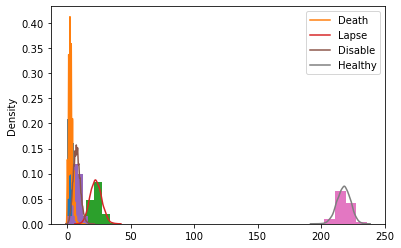

In [33]:
plt.hist(data[0,:], n_bins, density=True, histtype='bar', stacked=True)
sns.kdeplot(data[0,:])

plt.hist(data[1,:], n_bins, density=True, histtype='bar', stacked=True)
sns.kdeplot(data[1,:])

plt.hist(data[2,:], n_bins, density=True, histtype='bar', stacked=True)
sns.kdeplot(data[2,:])

plt.hist(data[3,:], n_bins, density=True, histtype='bar', stacked=True)
sns.kdeplot(data[3,:])
plt.legend(label)

plt.show()

In [34]:
def simulasi_binom(simul = 10000):
    "Membuat array untuk masing-masing status"
    data = np.zeros((4,simul))

    prob = [0.01,0.09,0.03,0.87] #Death Lapse Disable Healthy
    
    cond_prob = [0.01,0.09/(1-0.01), 0.03/(1-0.01-0.09),1]
    
    label = ['Death','Lapse','Disable','Healthy']
    
    for i in range(simul):
        rand = np.random.rand()
        n = 250 # Banyaknya orang

        for j in range(len(prob)):
            data[j,i] = binom.ppf(rand,n,cond_prob[j])
            n -= data[j,i]
            
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flatten()
    n_bins = 5
    ax0.hist(data[0,:], n_bins, density=True, histtype='bar', stacked=True)
    ax0.set_title('Death Distribution')
    
    ax1.hist(data[1,:], n_bins, density=True, histtype='bar', stacked=True)
    ax1.set_title('Lapse Distribution')
    
    ax2.hist(data[2,:], n_bins, density=True, histtype='bar', stacked=True)
    ax2.set_title('Disable Distribution')

    ax3.hist(data[3,:], n_bins, density=True, histtype='bar', stacked=True)
    ax3.set_title('Healthy Distribution')

    fig.tight_layout()
    # line 1 points

    #simulasi = np.arange(1,simul+1)
    #plt.stackplot(simulasi,data, labels=['Death','Lapse','Disable','Healthy'])
    #plt.legend(loc='upper left')
    #plt.show()
    
    df = pd.DataFrame(dict(Death=data[0,:],
                           Lapse=data[1,:],
                           Disable=data[2,:],
                           Healthy=data[3,:],
                           ))
    fig = px.box(df)
    fig = px.histogram(df)
    fig.show()
    
    return print(f'Hasil dari simulasi dengan banyak simulasi sebesar {simul} adalah :\n Rataan yang death : {data[0,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[0,:]))} \n Rataan yang lapse : {data[1,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[1,:]))}\n Rataan yang disable : {data[2,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[2,:]))}\n Rataan yang healthy : {data[3,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[3,:]))} \n'),data

Hasil dari simulasi dengan banyak simulasi sebesar 10000 adalah :
 Rataan yang death : 2.5052 dengan standar deviasi 1.5809405301908102 
 Rataan yang lapse : 22.5014 dengan standar deviasi 4.409240075114985
 Rataan yang disable : 7.4843 dengan standar deviasi 2.5038277716328654
 Rataan yang healthy : 217.5091 dengan standar deviasi 8.442530259939849 



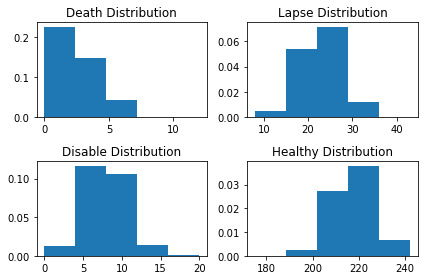

In [35]:
data = simulasi_binom()

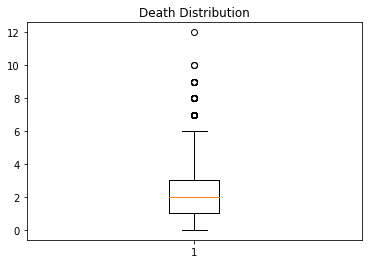

In [37]:
plt.boxplot(data[1][0,:])
plt.title('Death Distribution')
plt.show()

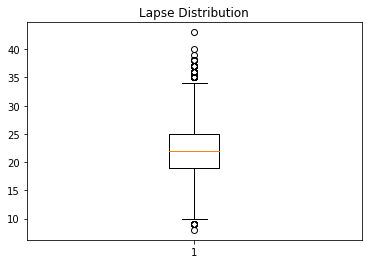

In [38]:
plt.boxplot(data[1][1,:])
plt.title('Lapse Distribution')
plt.show()

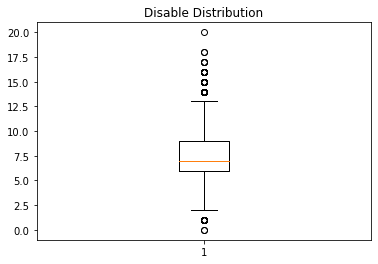

In [39]:
plt.boxplot(data[1][2,:])
plt.title('Disable Distribution')
plt.show()

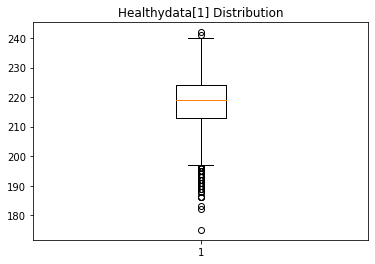

In [40]:
plt.boxplot(data[1][3,:])
plt.title('Healthydata[1] Distribution')
plt.show()

In [41]:
def simulasi_norm(simul = 10000):
    "Membuat array untuk masing-masing status"
    data = np.zeros((4,simul))

    prob = [0.01,0.09,0.03,0.87] #Death Lapse Disable Healthy
    
    cond_prob = [0.01,0.09/(1-0.01), 0.03/(1-0.01-0.09),1]
    
    label = ['Death','Lapse','Disable','Healthy']
    
    for i in range(simul):
        rand = np.random.rand()
        n = 250 # Banyaknya orang

        for j in range(len(prob)-1): #Minus 1 karna status terakhir sudah pasti sisa dari yang belum memiliki status  
            data[j,i] = np.around(norm.ppf(rand,loc = n*cond_prob[j], scale = np.sqrt(n*cond_prob[j]*(1-cond_prob[j]))))
            n -= data[j,i]
        data[3,i] = 250 - np.sum(data[:3,i])
        
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flatten()
    n_bins = 5
    ax0.hist(data[0,:], n_bins, density=True, histtype='bar', stacked=True)
    ax0.set_title('Death Distribution')
    
    ax1.hist(data[1,:], n_bins, density=True, histtype='bar', stacked=True)
    ax1.set_title('Lapse Distribution')
    
    ax2.hist(data[2,:], n_bins, density=True, histtype='bar', stacked=True)
    ax2.set_title('Disable Distribution')

    ax3.hist(data[3,:], n_bins, density=True, histtype='bar', stacked=True)
    ax3.set_title('Healthy Distribution')

    fig.tight_layout()
    # line 1 points

    #simulasi = np.arange(1,simul+1)
    #plt.stackplot(simulasi,data, labels=['Death','Lapse','Disable','Healthy'])
    #plt.legend(loc='upper left')
    #plt.show()
    
    df = pd.DataFrame(dict(Death=data[0,:],
                           Lapse=data[1,:],
                           Disable=data[2,:],
                           Healthy=data[3,:],
                           ))
    fig = px.box(df)
    fig = px.histogram(df)
    fig.show()
    
    return print(f'Hasil dari simulasi dengan banyak simulasi sebesar {simul} adalah :\n Rataan yang death : {data[0,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[0,:]))} \n Rataan yang lapse : {data[1,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[1,:]))}\n Rataan yang disable : {data[2,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[2,:]))}\n Rataan yang healthy : {data[3,:].mean()} dengan standar deviasi {np.sqrt(np.var(data[3,:]))} \n'),data

Hasil dari simulasi dengan banyak simulasi sebesar 10000 adalah :
 Rataan yang death : 2.5307 dengan standar deviasi 1.5731679853086256 
 Rataan yang lapse : 22.5804 dengan standar deviasi 4.3178160961300796
 Rataan yang disable : 7.5188 dengan standar deviasi 2.471284394803641
 Rataan yang healthy : 217.3701 dengan standar deviasi 8.322855639142132 



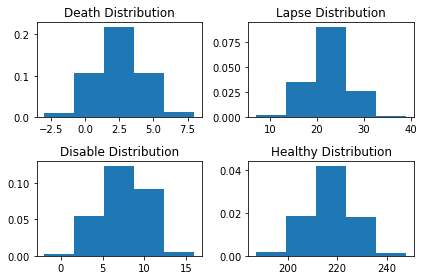

In [42]:
data = simulasi_norm()

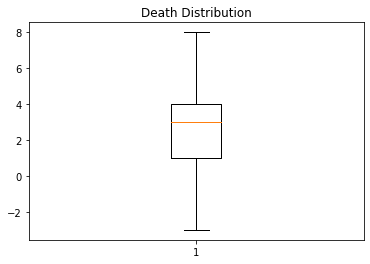

In [43]:
plt.boxplot(data[1][0,:])
plt.title('Death Distribution')
plt.show()

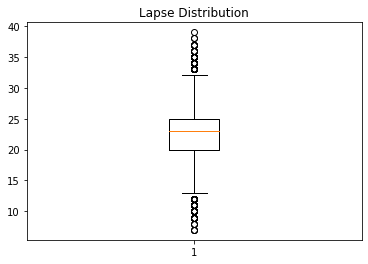

In [44]:
plt.boxplot(data[1][1,:])
plt.title('Lapse Distribution')
plt.show()

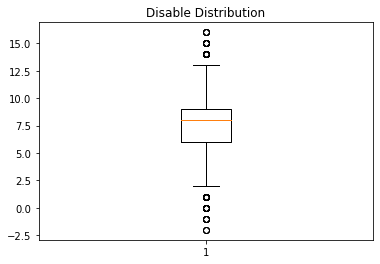

In [45]:
plt.boxplot(data[1][2,:])
plt.title('Disable Distribution')
plt.show()

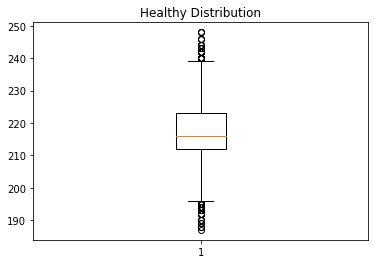

In [46]:
plt.boxplot(data[1][3,:])
plt.title('Healthy Distribution')
plt.show()